# Student ID: 22041023

## Task 1 Part 1 (45%)







In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
# Import Required Libraries for Part 1 here:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import datasets, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### 1.1 Dataset (6 Marks)

The dataset is CIFAR-10 from www.cs.toronto.edu -[Link](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

print("Training Images Data Type:", train_images.dtype)

Training Images Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Test Images Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)
Training Images Data Type: float64


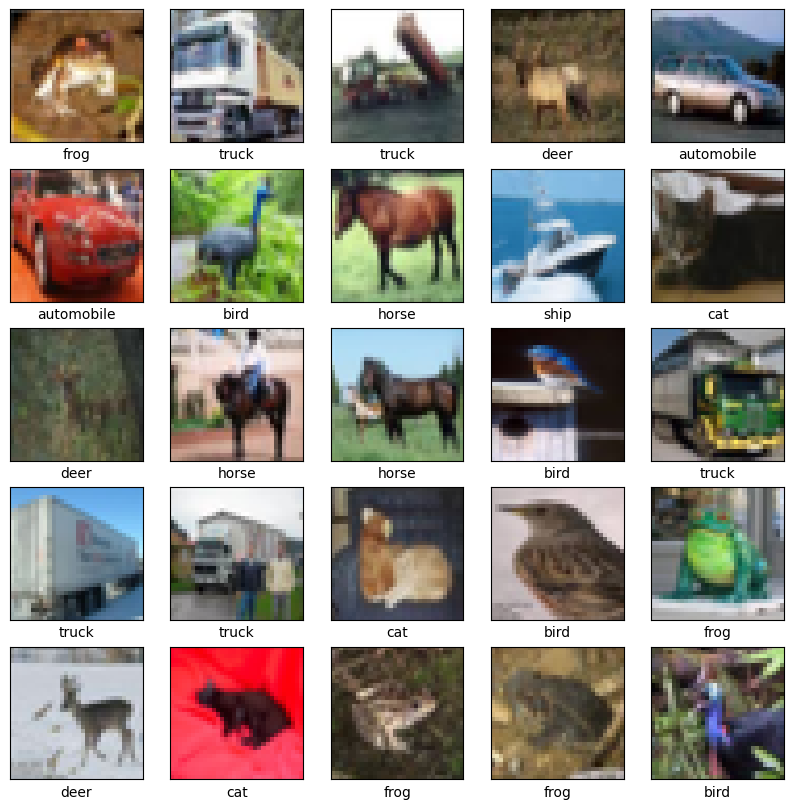

In [8]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Preparing dataset for Deep Learning

In [9]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.RandomCrop(32, padding=4), transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

100%|██████████| 170M/170M [00:05<00:00, 30.2MB/s]


In [10]:
classes = train_dataset.classes
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### 1.2 Building a Convolutional Neural Network (CNN) (6 Marks)


In [11]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [12]:
train_size = 0.8
lr = 3e-4
weight_decay = 8e-9
batch_size = 64
epochs = 100

In [13]:
model2 = models.Sequential()

# Conv layer 1
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

# Conv layer 2
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

#Conv layer 3
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Flatten the layers
model2.add(layers.Flatten())

#Add dropout
model2.add(layers.Dropout(0.4))


model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Adding early stopping to prevent overfitting (accuracy is >90% which is why I suspect overfitting)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

### 1.3 Training the CNN Model and Visualising Learning Curves (6 Marks)


In [17]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2_trained = model2.fit(train_images, train_labels,
                            epochs=30,
                            validation_data=(test_images, test_labels),
                            callbacks=[early_stop])

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.5636 - loss: 1.2140 - val_accuracy: 0.6300 - val_loss: 1.0443
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.6226 - loss: 1.0650 - val_accuracy: 0.6756 - val_loss: 0.9410
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 33ms/step - accuracy: 0.6568 - loss: 0.9768 - val_accuracy: 0.6794 - val_loss: 0.9214
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 27ms/step - accuracy: 0.6796 - loss: 0.9125 - val_accuracy: 0.7061 - val_loss: 0.8510
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - accuracy: 0.6920 - loss: 0.8703 - val_accuracy: 0.7026 - val_loss: 0.8645
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7171 - loss: 0.8093 - val_accuracy: 0.7131 - val_loss: 0.8177
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7216 - loss: 0.7909 - val_accuracy: 0.7180 - val_loss: 0.8043
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7325 -

In [18]:
import pickle

with open('model2_history.pkl', 'wb') as f:
    pickle.dump(model2_trained.history, f)

In [19]:
with open('model2_history.pkl', 'rb') as f:
    history = pickle.load(f)

In [20]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.7549 - loss: 0.7295


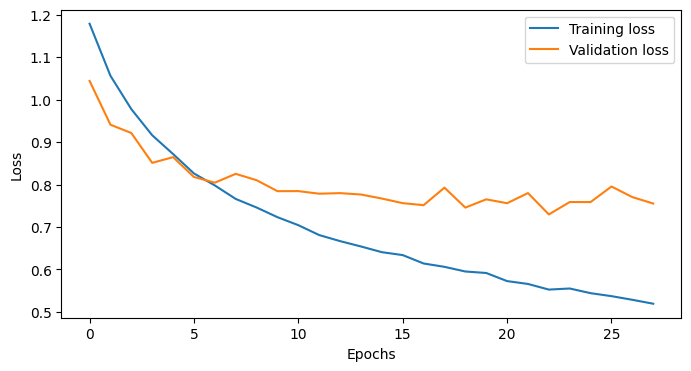

In [21]:
#Visualise learning curve
history = model2_trained.history
plt.figure(figsize=(8,4))

plt.plot(history['loss'], label='Training loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

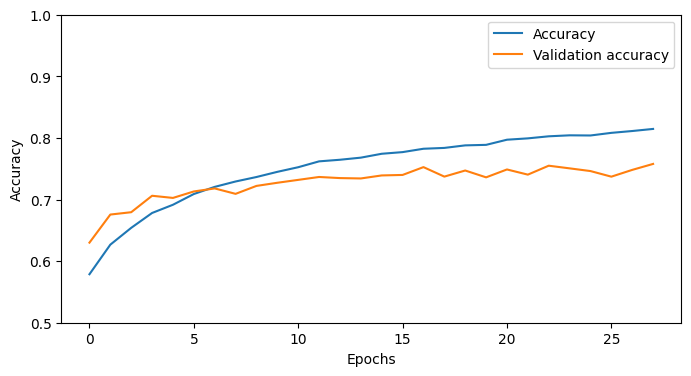

In [22]:
plt.figure(figsize=(8,4))

plt.plot(history['accuracy'], label='Accuracy')
plt.plot(history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

### 1.4 Test and Evaluate the Performance (6 Marks)


In [23]:
print("Test Accuracy: ",test_acc)
print("Test Loss: ", test_loss)

Test Accuracy:  0.7548999786376953
Test Loss:  0.7294895052909851


In [24]:
# model predictions
pred_probs = model2.predict(test_images)
pred_labels = np.argmax(pred_probs, axis=1)

# classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

    airplane       0.77      0.78      0.78      1000
  automobile       0.88      0.86      0.87      1000
        bird       0.63      0.68      0.65      1000
         cat       0.55      0.61      0.58      1000
        deer       0.72      0.71      0.72      1000
         dog       0.67      0.67      0.67      1000
        frog       0.82      0.81      0.82      1000
       horse       0.82      0.75      0.78      1000
        ship       0.87      0.85      0.86      1000
       truck       0.85      0.84      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.76     10000
weighted avg       0.76      0.75      0.76     10000



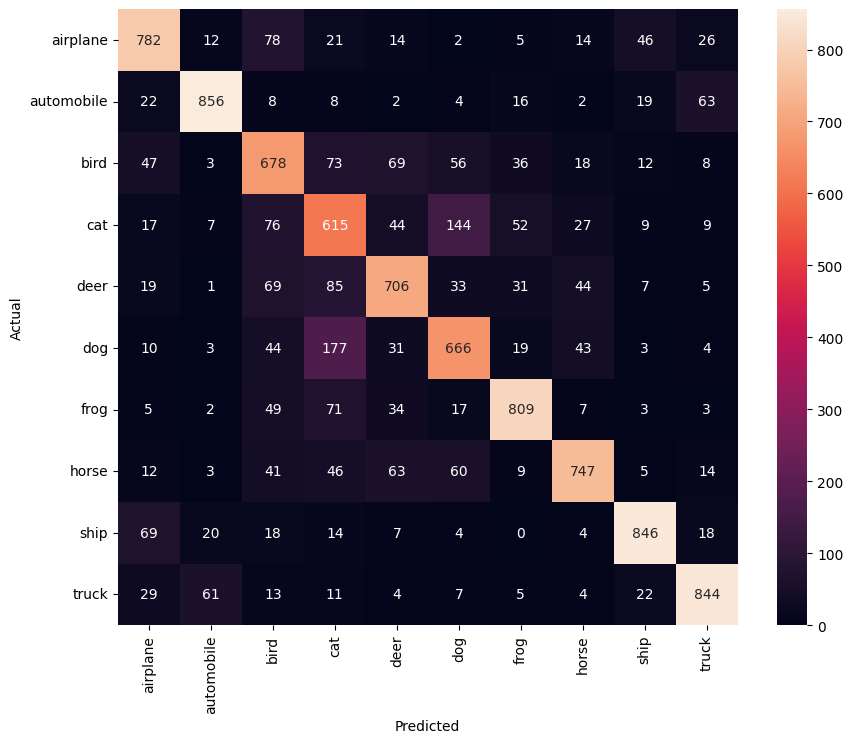

In [25]:
#confusion matrix
conf_m = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(conf_m, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



### 1.5 Visualise the Model's Predictions (6 Marks)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

<ipython-input-26-ae22b94ee5e1>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_true = int(test_labels[image_number])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


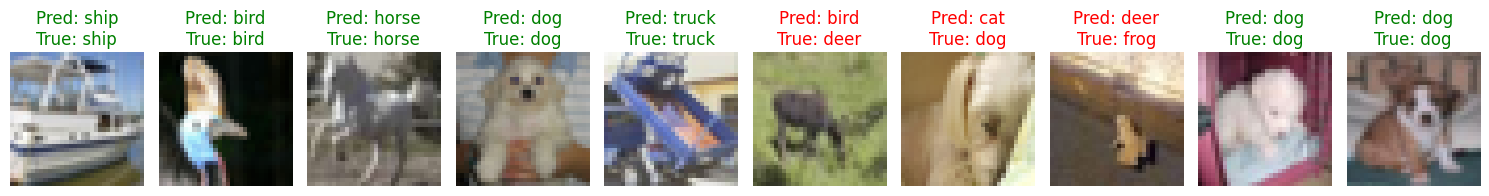

In [26]:
#Visualise models predictions
import random
num_img_plot = 10

test_img_sample = random.sample(range(0, len(test_images)), num_img_plot)

plt.figure(figsize=(15, 5))

for i, image_number in enumerate(test_img_sample):
    img = test_images[image_number]
    label_true = int(test_labels[image_number])

    # Predict
    p = img.reshape(1, 32, 32, 3)
    pred_index = model2.predict(p).argmax()

    # Plot
    plt.subplot(1, num_img_plot, i + 1)
    plt.imshow(img)
    plt.axis('off')

    title_color = 'green' if pred_index == label_true else 'red'
    plt.title(f"Pred: {class_names[pred_index]}\nTrue: {class_names[label_true]}", color=title_color)

plt.tight_layout()
plt.show()

### 1.6 Analyse the model's results and limitations (6 Marks)
The analysis depends on the network architecture and reported results



Insert analysis and discussion here with references and refer to the obtained results and figures



In the CNN architecture I included three convolutional layers with ReLU activation functions and max pooling layers. I added flattening layer, dense layer and final output layer with 10 units corresponding to 10 classes. I also introuduced dropout layer to prevent overfitting and ealry stopping mechanism to optimise training and prevent model from memorising - support generalisation.

**Training Results**

- 10 epochs (no early stopping)
  - accuracy: 0.7205, loss: 0.8555

The performance was decent, however model may benefit from more trainig cycles.
  
- 30 epochs (no early stopping)
  - accuracy: 0.6769, loss: 2.1617

The performance was still decent, but I noticed significant overfiting which resulted in worse generalisation.

- 5 epochs (early stopping implemented, patience=5)
  -  accuracy: 0.6862, loss: 2.2580

Early stopping mechanism kicked in too quickly, resulting in model being underfitted.

- 30 epochs (30 with early stop implemented, patience=5 and dropout layer = 0.5)
  -  accuracy: 0.7556, loss: 0.7111

Best performing model. It generalises much better than the previous ones with loss decreasing and accuracy increasing.

- 21 epochs (30 with early stop implemented, patience=5 and dropout layer = 0.3)
  -  accuracy: 0.7415, loss: 0.7614

- 29 epochs (30 with early stop implemented, patience=5 and dropout layer = 0.4)
  -  accuracy: 0.7527; loss: 0.7468

By introducing dropout layer at the rate of 0.5, overfitting was reduced and allowed the model to generalise better. Ealry stopping helped to ensure that the model didn't overtrain.

From the classification report we can see that the overall accuracy of 74% was obtained. The macro average of F1-score is 0.75, meaning the model performs reasonably well across all classes, suggesting balanced performance.

On the confusion matrix , it's clear that the model struggles to distinguish between cats and dogs (128 cases). We can also see birds being misclassified as cats (93 cases) and deers (72 cases).

### 1.7 Discuss potential ways to improve the model's performance, including adding more layers, changing/adding activation functions, changing the optimisation function, reducing overfitting, and dealing with underfitting by tweaking the learning rate, training for longer and/or using early stopping, applying data augmentation and transfer learning, and use less regularisation. (6 Marks)
You should try various network settings and strategies to improve performance. Here I provided several schemes to improve the performance. It is not necessary to use all of them but effective usage will result in higher marks

In [ ]:
#Insert the code of strategies you used to improve the performance

In my model I used some techniques in order to imporve the performance. These include:
- introducing dropout layer of 0.5
- implementing early stopping mechanism which monitors validation loss with patience parameter set to 5 to prevent overfitting

Since there seems to be confusion in the case of classes that look similar (e.g. cat vs dog and bird vs cat), model should be improved by data augmentation - to increase data diversity, promoting better results. It could also be worth fine-tuning the learning rate to prevent memorization.

### 1.8 References (3 Marks)

https://www.tensorflow.org/tutorials/images/cnn

## Task 1 Part 2 (45%)


In [27]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 11.2 MB/s eta 0:00:00


In [28]:
# Import Required Libraries for Part 2 here:
import pandas as pd
import numpy as np
from tqdm import tqdm
#import gensim
from tensorflow.keras.preprocessing.text import Tokenizer #This line imports Tokenizer from the newer location
tqdm.pandas(desc="progress-bar")
#from gensim.models import Doc2Vec # gensim is now installed and can be imported

from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from tensorflow.keras.preprocessing.text import Tokenizer #for tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences #for pre-processin pad sequencing

from tensorflow.keras.utils import pad_sequences #This line imports pad_sequences from the newer location
from sklearn.linear_model import LogisticRegression
#from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

#model training

from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

#improving the data for the training
import nlpaug.augmenter.word as naw
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from sklearn.utils import shuffle



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


### 2.1 Dataset (6 Marks)

The dataset is xxxxx from xxxx -[Link](https://)

In [29]:
data = pd.read_csv('/content/drive/MyDrive/Data Science course/Applied Deep Learning/Task 1 P2 Dataset/IMDB Dataset.csv',delimiter=',',encoding='latin-1')

In [30]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
data.shape

(50000, 2)

In [32]:
data.index = range(50000)
data['review'].apply(lambda x: len(x.split(' '))).sum()

np.int64(11557297)

Text(0.5, 1.0, 'Distribution of sentiment classes')

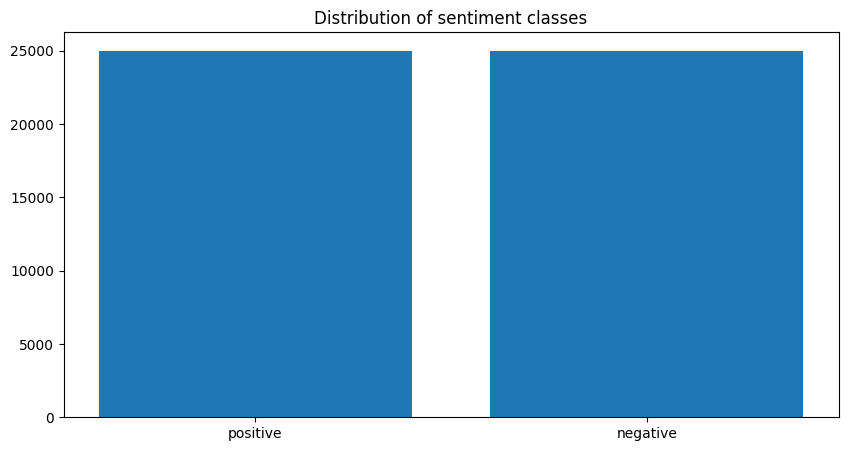

In [33]:
val_count = data['sentiment'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(val_count.index, val_count.values)
plt.title("Distribution of sentiment classes")

In [34]:
data.head(400).sentiment.value_counts()

,count
sentiment,
negative,210
positive,190


In [35]:
data.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


We can see that the rows are shuffled.

In [36]:
# define function to print review from the dataset
def print_review(index):
  example_review = data[data.index == index][['review', 'sentiment']].values[0]
  if len(example_review) > 0:
    print(example_review[0])
    print('Review sentiment:', example_review[1])

print_review(30)

Taut and organically gripping, Edward Dmytryk's Crossfire is a distinctive suspense thriller, an unlikely "message" movie using the look and devices of the noir cycle.<br /><br />Bivouacked in Washington, DC, a company of soldiers cope with their restlessness by hanging out in bars. Three of them end up at a stranger's apartment where Robert Ryan, drunk and belligerent, beats their host (Sam Levene) to death because he happens to be Jewish. Police detective Robert Young investigates with the help of Robert Mitchum, who's assigned to Ryan's outfit. Suspicion falls on the second of the three (George Cooper), who has vanished. Ryan slays the third buddy (Steve Brodie) to insure his silence before Young closes in.<br /><br />Abetted by a superior script by John Paxton, Dmytryk draws precise performances from his three starring Bobs. Ryan, naturally, does his prototypical Angry White Male (and to the hilt), while Mitchum underplays with his characteristic alert nonchalance (his role, howeve

###Preprocessing

In [37]:
stop_words = stopwords.words('english')
stemming = SnowballStemmer('english')

text_clean_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocessed(text, stem=False):
  text = re.sub(text_clean_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemming.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [38]:
data['review'] = data['review'].apply(lambda x: preprocessed(x))

In [39]:
data.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


In [40]:
print_review(30)

taut organically gripping edward dmytryk crossfire distinctive suspense thriller unlikely message movie using look devices noir cycle br br bivouacked washington dc company soldiers cope restlessness hanging bars three end stranger apartment robert ryan drunk belligerent beats host sam levene death happens jewish police detective robert young investigates help robert mitchum assigned ryan outfit suspicion falls second three george cooper vanished ryan slays third buddy steve brodie insure silence young closes br br abetted superior script john paxton dmytryk draws precise performances three starring bobs ryan naturally prototypical angry white male hilt mitchum underplays characteristic alert nonchalance role however central young may never better gloria grahame gives first fully fledged rendition smart mouthed vulnerable tramp sad sack leeched life paul kelly haunts us small peripheral role makes memorable br br politically engaged dmytryk perhaps inevitably succumbs sermonizing prett

### 2.2 Building LSTM (6 Marks)


In [41]:
#Train Test Split
train_size = 0.8
max_seq_length = 30

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print('Train set:', len(train_data))
print('Test set:', len(test_data))

Train set: 40000
Test set: 10000


In [42]:
#Tokenize the train data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['review'])

word_idx = tokenizer.word_index
vocab_size = len(word_idx)+1 #+1 is to account for index 0
print("Size of the vocabulary:", vocab_size)

Size of the vocabulary: 92210


In [43]:
train_data.head()

,review,sentiment
39087,kept asking many fights screaming matches swea...,negative
30893,watch entire movie could watch entire movie st...,negative
45278,touching love story reminiscent mood love draw...,positive
16398,latter day fulci schlocker totally abysmal con...,negative
13653,first firmly believe norwegian movies continua...,negative


In [44]:
#use pad sequencing to ensure no variance in input shapes of sequences in the review
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=max_seq_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=max_seq_length)

print('Shape of x_train:', x_train.shape)
print('Shape of x_test:', x_test.shape)

Shape of x_train: (40000, 30)
Shape of x_test: (10000, 30)


In [45]:
#Encode the labels
labels = train_data['sentiment'].unique().tolist()
print(labels)

encoder = LabelEncoder()
encoder.fit(train_data['sentiment'].to_list())

y_train = encoder.transform(train_data['sentiment'].to_list())
y_test = encoder.transform(test_data['sentiment'].to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

['negative', 'positive']
Shape of y_train: (40000, 1)
Shape of y_test: (10000, 1)


In [46]:
#Word embedding using GloVe Embedding from Stanford AI
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-04-29 21:20:30--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-29 21:20:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-29 21:20:30--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [47]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '/content/drive/MyDrive/Data Science course/Applied Deep Learning/Template_CSC_20071_Applied_Deep_Learning_Assignment_Submission.ipynb'

In [48]:
embeddings_idx = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_idx[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_idx))

Found 400000 word vectors.


In [49]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_idx.items():
  embedding_vector = embeddings_idx.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector


In [50]:
import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          #input_length=max_seq_length, this argument is deprecated
                                          trainable=False)

In [51]:
#softmax function maybe use it, found it in one of the articles
sequence_input = Input(shape=(max_seq_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
outputs = Dense(1, activation='sigmoid')(x)
model_v2 = tf.keras.Model(sequence_input, outputs)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
#Adding early stopping to prevent overfitting (accuracy is >90% which is why I suspect overfitting)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4, #decreased 5-4
    restore_best_weights=True
)

### 2.3 Training the LSTM Model and Visualising Learning Curves (6 Marks)


In [53]:
model_v2.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
model_v2_trained = model_v2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[early_stop]) #early stop instead of reduce on plateau

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.6137 - loss: 4.2233 - val_accuracy: 0.7682 - val_loss: 1.2599
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 545ms/step - accuracy: 0.7538 - loss: 1.0005 - val_accuracy: 0.7794 - val_loss: 0.5320
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 548ms/step - accuracy: 0.7733 - loss: 0.5186 - val_accuracy: 0.7903 - val_loss: 0.4541
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 544ms/step - accuracy: 0.7859 - loss: 0.4642 - val_accuracy: 0.7848 - val_loss: 0.4540
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 42s 571ms/step - accuracy: 0.7944 - loss: 0.4483 - val_accuracy: 0.7999 - val_loss: 0.4284
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 557ms/step - accuracy: 0.8106 - loss: 0.4196 - val_accuracy: 0.8039 - val_loss: 0.4165
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 542ms/step - accuracy: 0.8180 - loss: 0.4052 - val_accuracy: 0.8018 - val_loss: 0.4262
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 542ms/step - accuracy: 0.8269 - loss: 0.3895 - val_accu

In [55]:
x_train[1]

array([    1,  1154,   146,   953,    29,    35,    11, 10652,    27,
           2,   511,  4743,   968,  6724,   426,   153,  2310,   779,
         103,    50,   583,  7145,   487,   341,   118,   936,     2,
          23,  1578,    28], dtype=int32)

In [56]:
import random

def insert_word(text, index_to_word, aug_p=0.2):  # aug_p is probability of inserting a word
    words = text.split()
    for i in range(len(words)):  # Iterate through each word
        if random.random() < aug_p:
            random_word_index = random.randint(1, len(index_to_word))  # Get a random word
            random_word = index_to_word.get(random_word_index)
            if random_word is not None:  # Insert if word is found
                words.insert(i, random_word)  # Insert before the current word
    return ' '.join(words)

In [57]:
import nlpaug.augmenter.word as naw
from sklearn.utils import shuffle
import random

# Create augmenters
aug_synonym = naw.SynonymAug(aug_src='wordnet')

# Define the custom insert_word function
def insert_word(text, index_to_word, aug_p=0.2):
    words = text.split()
    for i in range(len(words)):
        if random.random() < aug_p:
            random_word_index = random.randint(1, len(index_to_word))
            random_word = index_to_word.get(random_word_index)
            if random_word is not None:
                words.insert(i, random_word)
    return ' '.join(words)

# Only run once
if 'review_aug' not in locals() or 'review_aug' not in globals():
    review_aug = []
    augmented_labels = []  # List to store augmented labels

    # Define index_to_word here, before the loop
    index_to_word = {index: word for word, index in tokenizer.word_index.items()}

    for review_ids, label in zip(x_train, y_train):  # Iterate over reviews and labels together
        review_text = ' '.join([index_to_word[word_id] for word_id in review_ids if word_id != 0])

        # Apply synonym augmentation
        augmented_review_syn = aug_synonym.augment(review_text)

        # Apply custom insertion augmentation
        augmented_review_insert = insert_word(review_text, index_to_word)

        # Convert augmented text back to word IDs
        augmented_review_ids_syn = tokenizer.texts_to_sequences([augmented_review_syn])[0]
        augmented_review_ids_ins = tokenizer.texts_to_sequences([augmented_review_insert])[0]

        # Pad augmented sequences to maintain consistent length
        augmented_review_ids_syn = pad_sequences([augmented_review_ids_syn], maxlen=max_seq_length, padding="post")[0]
        augmented_review_ids_ins = pad_sequences([augmented_review_ids_ins], maxlen=max_seq_length, padding="post")[0]

        # Add augmented reviews and their labels
        review_aug.append(augmented_review_ids_syn)
        review_aug.append(augmented_review_ids_ins)
        augmented_labels.extend([label, label])  # Duplicate the original label twice

    # Extend x_train with augmented reviews and y_train with augmented labels
    x_train = np.vstack([x_train, np.array(review_aug)])
    y_train = np.concatenate([y_train, np.array(augmented_labels)])

    # Shuffle the combined data
    x_train, y_train = shuffle(x_train, y_train) # Correctly shuffling both arrays together

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [58]:
# Compile model_v2
model_v2.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_v3_trained = model_v2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 65s 504ms/step - accuracy: 0.7153 - loss: 0.5013 - val_accuracy: 0.8134 - val_loss: 0.4044
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 59s 504ms/step - accuracy: 0.7296 - loss: 0.4717 - val_accuracy: 0.8127 - val_loss: 0.4173
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 84s 520ms/step - accuracy: 0.7386 - loss: 0.4537 - val_accuracy: 0.8143 - val_loss: 0.4134
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 61s 514ms/step - accuracy: 0.7487 - loss: 0.4383 - val_accuracy: 0.8187 - val_loss: 0.4144
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 514ms/step - accuracy: 0.7527 - loss: 0.4258 - val_accuracy: 0.8160 - val_loss: 0.4226


In [59]:
# Compile model_v2
model_v2.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

#model with patience 4, through data augmentation there is a change of 40->118 steps per epoch (due to increase in training data, adding the augmented data)
model_v4_trained = model_v2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 68s 530ms/step - accuracy: 0.7178 - loss: 0.4933 - val_accuracy: 0.8135 - val_loss: 0.4047
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 61s 517ms/step - accuracy: 0.7362 - loss: 0.4575 - val_accuracy: 0.8136 - val_loss: 0.4197
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 517ms/step - accuracy: 0.7444 - loss: 0.4427 - val_accuracy: 0.8150 - val_loss: 0.4279
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 81s 516ms/step - accuracy: 0.7550 - loss: 0.4254 - val_accuracy: 0.8107 - val_loss: 0.4318
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 83s 527ms/step - accuracy: 0.7643 - loss: 0.4087 - val_accuracy: 0.7920 - val_loss: 0.5116


In [60]:
# Compile model_v2
model_v2.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

#model with patience 4, through data augmentation there is a change of 40->118 steps per epoch (due to increase in training data, adding the augmented data), patience 2 (reduced)
model_v5_trained = model_v2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[early_stop, ReduceLROnPlateau(monitor='val_loss', patience=2)])

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 73s 543ms/step - accuracy: 0.7308 - loss: 0.4771 - val_accuracy: 0.8149 - val_loss: 0.4042 - learning_rate: 0.0010
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 79s 523ms/step - accuracy: 0.7423 - loss: 0.4469 - val_accuracy: 0.8179 - val_loss: 0.4104 - learning_rate: 0.0010
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 525ms/step - accuracy: 0.7505 - loss: 0.4320 - val_accuracy: 0.8125 - val_loss: 0.4219 - learning_rate: 0.0010
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 67s 572ms/step - accuracy: 0.7623 - loss: 0.4105 - val_accuracy: 0.8148 - val_loss: 0.4397 - learning_rate: 1.0000e-04
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 77s 531ms/step - accuracy: 0.7629 - loss: 0.4036 - val_accuracy: 0.8135 - val_loss: 0.4426 - learning_rate: 1.0000e-04


In [61]:
model_v2.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

#model with patience 4, through data augmentation there is a change of 40->118 steps per epoch (due to increase in training data, adding the augmented data)
#added L2 regularization to model's layers
model_v6_trained = model_v2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[early_stop, ReduceLROnPlateau(monitor='val_loss', patience=2)])
#thanks to L2 regularization model stopped overfitting - validation loss slowly decreasing
model_v2.save('model_v6.keras')

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 68s 533ms/step - accuracy: 0.7399 - loss: 0.4569 - val_accuracy: 0.8154 - val_loss: 0.4114 - learning_rate: 0.0010
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 81s 525ms/step - accuracy: 0.7526 - loss: 0.4316 - val_accuracy: 0.8125 - val_loss: 0.4083 - learning_rate: 0.0010
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 62s 528ms/step - accuracy: 0.7580 - loss: 0.4199 - val_accuracy: 0.8111 - val_loss: 0.4254 - learning_rate: 0.0010
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 84s 544ms/step - accuracy: 0.7628 - loss: 0.4073 - val_accuracy: 0.8125 - val_loss: 0.4361 - learning_rate: 0.0010
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 77s 508ms/step - accuracy: 0.7716 - loss: 0.3894 - val_accuracy: 0.8132 - val_loss: 0.4535 - learning_rate: 1.0000e-04
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 84s 526ms/step - accuracy: 0.7737 - loss: 0.3807 - val_accuracy: 0.8147 - val_loss: 0.4627 - learning_rate: 1.0000e-04


In [62]:
import pickle

with open('model_v6_history.pkl', 'wb') as f:
    pickle.dump(model_v6_trained.history, f)

In [63]:
with open('model_v6_history.pkl', 'rb') as f:
    history = pickle.load(f)

### 2.4 Test and Evaluate the Performance (6 Marks)


In [64]:
from tensorflow import keras
# Load the saved model
loaded_model = keras.models.load_model('model_v6.keras')

   # Evaluate the model
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)

313/313 - 4s - 13ms/step - accuracy: 0.8125 - loss: 0.4083


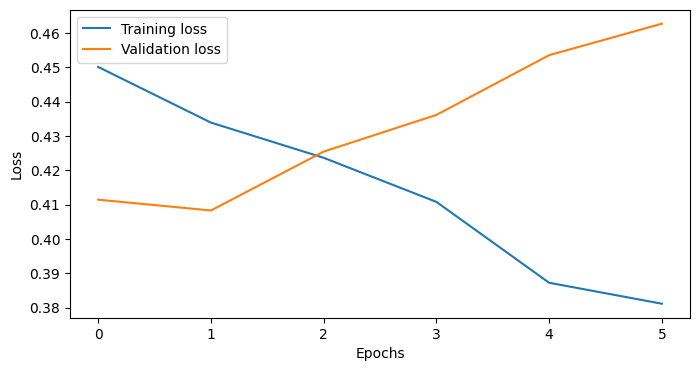

In [65]:
#Visualise learning curve
#history_p2 = loaded_model.history
plt.figure(figsize=(8,4))

plt.plot(history['loss'], label='Training loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

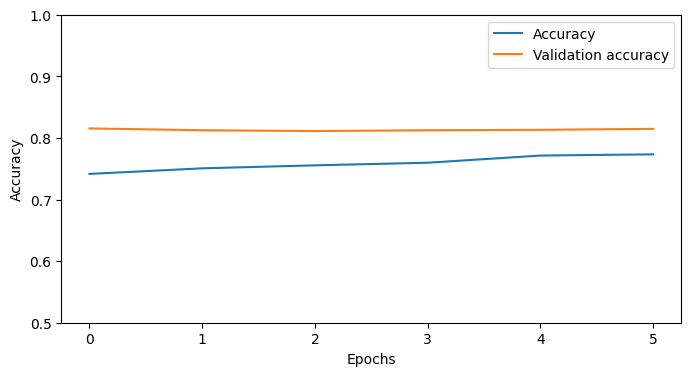

In [66]:
plt.figure(figsize=(8,4))

plt.plot(history['accuracy'], label='Accuracy')
plt.plot(history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

In [67]:
print("Test Accuracy: ",test_acc)
print("Test Loss: ", test_loss)

Test Accuracy:  0.8125
Test Loss:  0.4082934558391571


In [68]:
from sklearn.metrics import classification_report

# Get predictions
predictions = loaded_model.predict(x_test)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to labels (0 or 1)

# Inverse transform the labels to get the original sentiment classes
predicted_sentiments = encoder.inverse_transform(predicted_labels.flatten())
true_sentiments = encoder.inverse_transform(y_test.flatten())

# Generate classification report
report = classification_report(true_sentiments, predicted_sentiments)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

    negative       0.82      0.79      0.81      4961
    positive       0.80      0.83      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



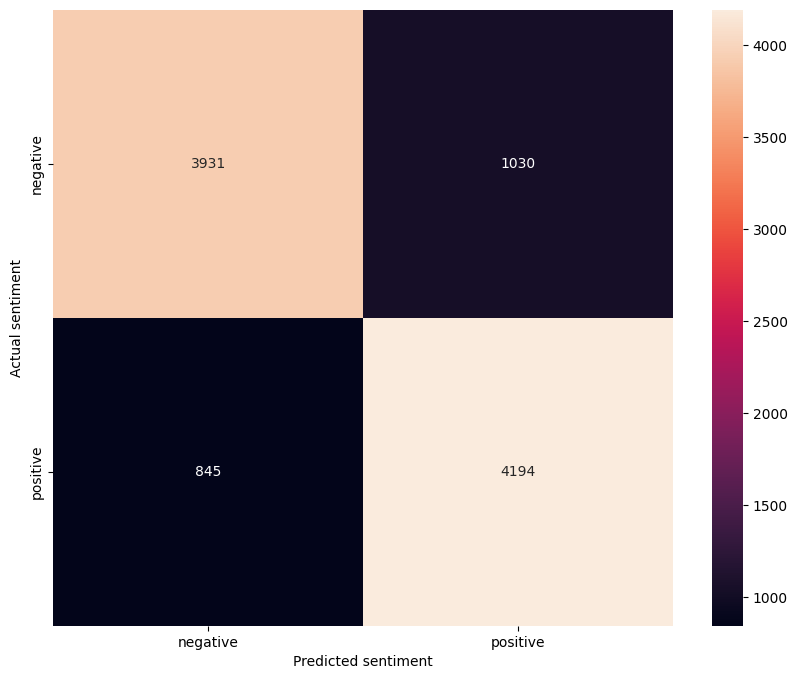

In [69]:
#confusion matrix
conf_m2 = confusion_matrix(true_sentiments, predicted_sentiments)
plt.figure(figsize=(10,8))
sns.heatmap(conf_m2, annot=True, fmt='d', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment')
plt.show()


### 2.5 Visualise the Model's Predictions (6 Marks)





In [70]:
#convert sequence back to text
def sequence_to_text(sequence_input):
  return " ".join([tokenizer.index_word[word_id] for word_id in sequence_input if word_id != 0])

num_samples = 20

for i in range(num_samples):
  review = sequence_to_text(x_test[i])
  # Convert y_test[i] to int before inverse_transform
  true_sentiment = encoder.inverse_transform([int(y_test[i][0])])
  # Get the prediction (shape (1, 1))
  prediction = loaded_model.predict(np.array([x_test[i]]))
  # Round the prediction and flatten it to a 1D array
  predicted_label = np.round(prediction).flatten()
  # Now, inverse transform to get the sentiment
  predicted_sentiment = encoder.inverse_transform(predicted_label.astype(int))


  print(f"Review {i+1}: {review}")
  print(f"True sentiment: {true_sentiment[0]}")
  print(f"Predicted sentiment: {predicted_sentiment[0]}")
  print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Review 1: jannetty undertaker took giant gonzalez another terrible match smoking gunns tatanka took bam bam bigelow headshrinkers yokozuna defended world title lex luger match boring terrible ending however deserves 8 10
True sentiment: positive
Predicted sentiment: positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Review 2: dvd admit thing kept sane whilst 12 hour night shift developed chronic insomnia farscape thing get extremely long nights br br favour watch pilot see mean br br farscape comet
True sentiment: positive
Predicted sentiment: negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Review 3: plot plan enjoy action expect coherent plot turn sense logic may reduce chance getting headache br br give hope steven seagal trying move back towards type characters portrayed popular movies
True sentiment: negative
Predicted sentiment: negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Review 4: sometimes forget american br br also brilliant jeremy northam

### 2.6 Analyse the model's results and limitations (6 Marks)
The analysis depends on the network architecture and reported results



Insert analysis and discussion here with references and refer to the obtained results and figures



### 2.7 Discuss potential ways to improve the model's performance, including adding more layers, changing/adding activation functions, changing the optimisation function, reducing overfitting, and dealing with underfitting by tweaking the learning rate, training for longer and/or using early stopping, applying data augmentation and transfer learning, and use less regularisation. (6 Marks)
You should try various network settings and strategies to improve performance. Here I provided several schemes to improve the performance. It is not necessary to use all of them but effective usage will result in higher marks

In [ ]:
Insert the code of strategies you used to improve the performance

Insert discussion about these strategies with references

1. Models architecture

```
sequence_input = Input(shape=(max_seq_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_v2 = tf.keras.Model(sequence_input, outputs)
```



- Model trained for 6/10 epochs with early stop implemented.
- Overfitting with accuracy ranging 0.91 - 0.93 and validation loss increasing (0.4875 to 0.5453)
- Will try to increase the dropout rate

2. Models architecture


```
sequence_input = Input(shape=(max_seq_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_v2 = tf.keras.Model(sequence_input, outputs)
```
- Model trained for 10/10 epochs with early stop implemented (patience=5)
- accuracy ranging 0.6-0.85 and validation loss decreasing 0.48 to 0.40 but is more stable unlike before
- dropout rate set to 0.6
- Will reduce patience to prevent sligth overfitting towards the end

3. Models architecture


```
sequence_input = Input(shape=(max_seq_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_v2 = tf.keras.Model(sequence_input, outputs)
```
- Model trained for 10/10 epochs with early stop implemented (patience=5)
- Applied data augmentation
- dropout rate set to 0.6
- accuracy ranging 0.6115-0.8477 and validation loss decreasing 0.4904 to 0.4062
- slight overfitting towards the end ( decrease in validation accuracy (0.8071 - 0.7851) and increase in validation loss (0.4116 - 0.4650) towards the end) -> decrease the patience value to help with that

4. Model (model_v4_trained) with data augmentation and patience 4
- through data augmentation there is a change of 40->118 steps per epoch (due to increase in training data, adding the augmented data
- Model trained for 8/10 epochs with early stop implemented(patience=4)
- accuracy ranging 0.6109 - 0.7563 and validation loss slightly increasing 0.4458 to 0.4479 - migth be due to overfitting

5. Model (model_v5_trained) with data augmentation, patience 2 and ReduceLROnPlateau implemented
- through data augmentation there is a change of 40->118 steps per epoch (due to increase in training data, adding the augmented data)
- Model trained for 6/10 epochs with early stop implemented(patience=2)
- accuracy ranging 0.7327 - 0.7705 and validation loss increasing 0.4099 to 0.4588

6. Model (model_v6_trained) with data augmentation, L2 normalization, patience=3 and ReduceLRonPlateau implemented
- through data augmentation there is a change of 40->118 steps per epoch (due to increase in training data, adding the augmented data)
- Model trained for 5/10 epochs with ealry stop implemented (patience=2)
- accuracy ranging 0.7241 - 0.7669 and validation loss increasing 0.4052 to 0.4400 (however it's still lower than in the earlier models)

Predictions correct 8/10 times




### 2.8 References (3 Marks)

https://ieeexplore.ieee.org/abstract/document/9421225


##Task 2

In [1]:
!pip install segmentation-models-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
!pip install torchinfo

In [3]:
# Import Required Libraries for Task 2 here:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# Image manipulation
from PIL import Image

# PyTorch libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary
from torch.optim.lr_scheduler import ReduceLROnPlateau

import albumentations as A
from albumentations.pytorch import ToTensorV2

from tqdm.auto import tqdm

import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import DiceLoss, JaccardLoss

from skimage.io import imread
from skimage.transform import resize
import os
torch.manual_seed(42)
np.random.seed(42)

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [4]:
#Dataset already split into train and test datasets - Train dataset + Train ground truth, Test dataset + Test ground truth

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset_path = '/content/drive/MyDrive/Data Science course/Applied Deep Learning/Task 2 Medical Image Segmentation/ISIC2016'

In [7]:
image_files = os.listdir(dataset_path)
print(image_files)

['ISBI2016_ISIC_Part1_Test_GroundTruth.zip', 'ISBI2016_ISIC_Part1_Training_Data.zip', 'ISBI2016_ISIC_Part1_Training_GroundTruth.zip', 'ISBI2016_ISIC_Part1_Test_Data.zip', '.DS_Store', 'ISBI2016_ISIC_Part1_Training_GroundTruth', 'ISBI2016_ISIC_Part1_Test_GroundTruth', 'ISBI2016_ISIC_Part1_Test_Data', 'ISBI2016_ISIC_Part1_Training_Data']


In [8]:
#loading already split data
img_path_train = os.path.join(dataset_path,'ISBI2016_ISIC_Part1_Training_Data')
mask_path_train = os.path.join(dataset_path,'ISBI2016_ISIC_Part1_Training_GroundTruth')
img_path_test = os.path.join(dataset_path,'ISBI2016_ISIC_Part1_Test_Data')
mask_path_test = os.path.join(dataset_path,'ISBI2016_ISIC_Part1_Test_GroundTruth')

In [9]:
train_size = 0.8
lr = 5e-4
weight_decay = 8e-9
batch_size = 16
epochs = 50
size = (128, 128)

In [10]:
train_image_files = os.listdir(img_path_train)
train_mask_files = os.listdir(mask_path_train)

In [11]:
n = 3  # Number of image-mask pairs to plot
samples_n = min(n, len(train_image_files))  # Ensure n doesn't exceed available files

# random samples from train data
random_indices = random.sample(range(len(train_image_files)), samples_n)

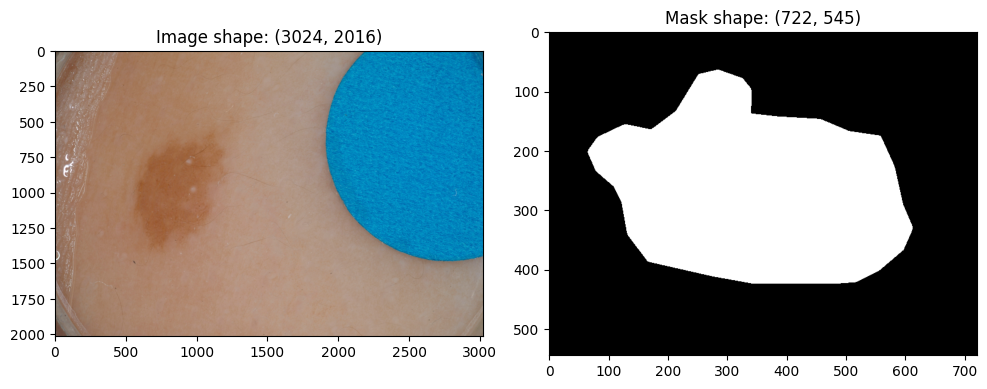

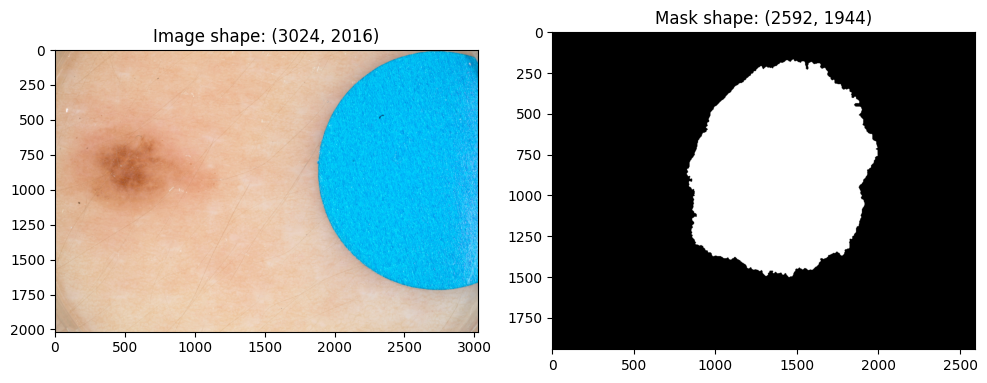

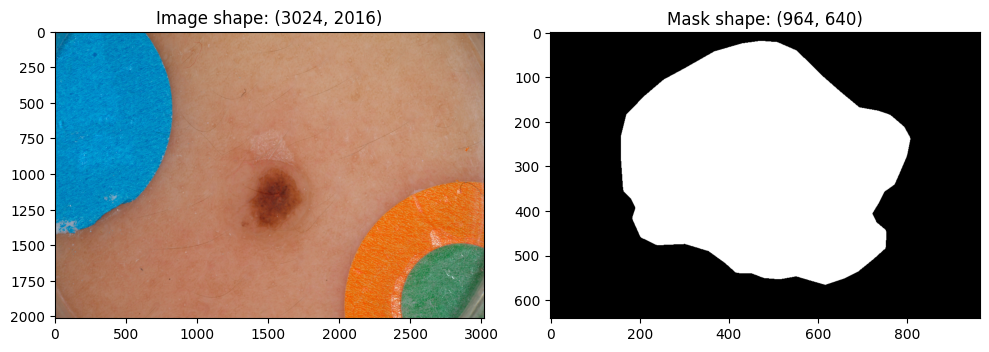

In [12]:
#Plot data from the train dataset
for i in random_indices:
    # Create full paths
    img_path = os.path.join(img_path_train, train_image_files[i])
    mask_path = os.path.join(mask_path_train, train_mask_files[i])

    # Load image and mask (using PIL)
    image = Image.open(img_path)
    mask = Image.open(mask_path)

    # Extract the shape of the image
    image_shape = image.size
    mask_shape = mask.size

    # Convert to np arrays for visualisation
    array_image = np.array(image)
    array_mask = np.array(mask)


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(array_image)
    plt.title(f"Image shape: {image_shape}")

    plt.subplot(1, 2, 2)
    plt.imshow(array_mask, cmap='grey') # Using 'grey' since training ground truth provided in greyscale
    plt.title(f"Mask shape: {mask_shape}")

    plt.tight_layout()
    plt.show()

Here we can see that the image shapes and mask shapes are different.

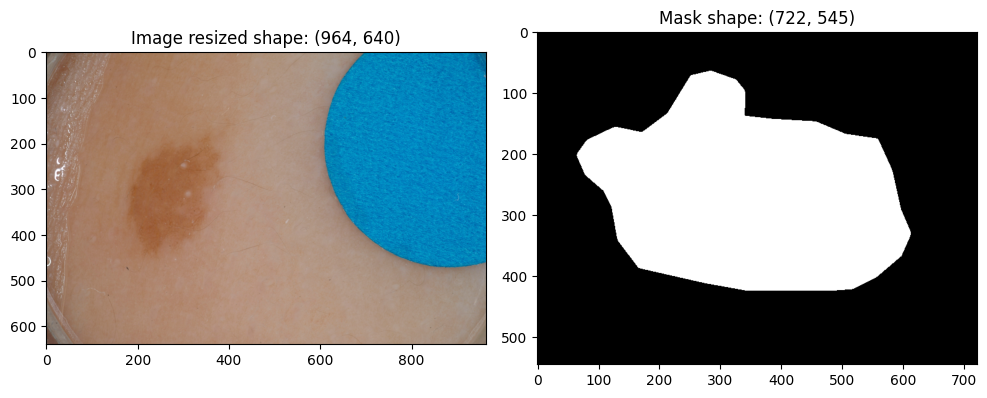

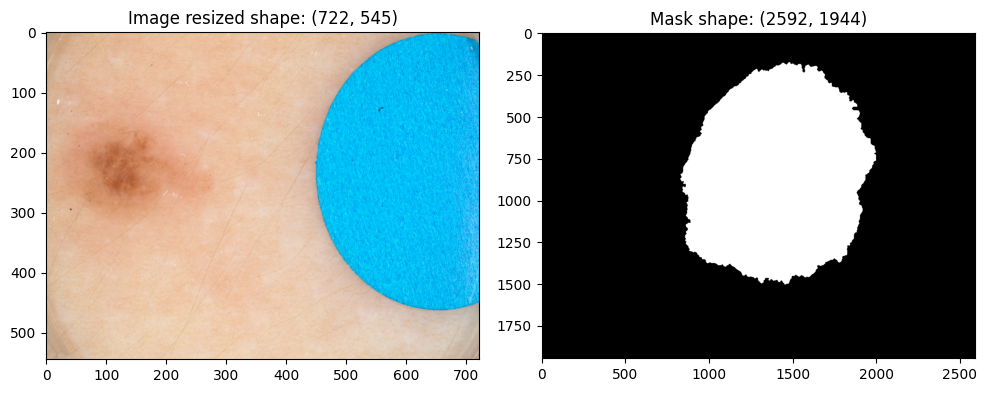

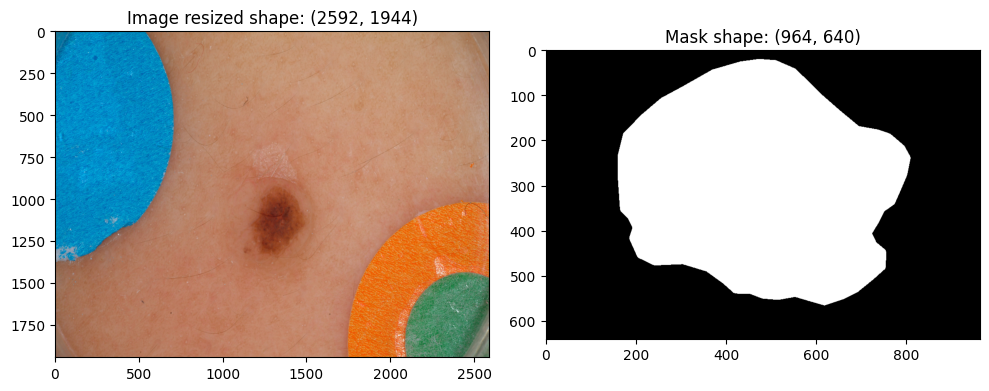

In [13]:
#Resize the image to match the mask shape and plot data from the train dataset
for i in random_indices:
    # Create full paths
    img_path = os.path.join(img_path_train, train_image_files[i])
    mask_path = os.path.join(mask_path_train, train_mask_files[i])

    # Load image and mask (using PIL)
    image = Image.open(img_path)
    mask = Image.open(mask_path)

    # Resize the image
    image_resized = image.resize(mask_shape)

    # Convert to np arrays for visualisation
    array_image_resized = np.array(image_resized)
    array_mask = np.array(mask)

    # Extract the shape of the image
    image_shape_resized = image_resized.size
    mask_shape = mask.size


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(array_image_resized)
    plt.title(f"Image resized shape: {image_shape_resized}")

    plt.subplot(1, 2, 2)
    plt.imshow(array_mask, cmap='grey') # Using 'grey' since training ground truth provided in greyscale
    plt.title(f"Mask shape: {mask_shape}")

    plt.tight_layout()
    plt.show()

In [14]:
# Custom dataset to handle loading images and masks
class LoadDataset(Dataset):
  def __init__(self, image_paths, mask_paths, transform=None, mask_transform=None):
    self.image_paths = image_paths
    self.mask_paths = mask_paths
    self.transform = transform
    self.transform_mask = mask_transform
    self.images = os.listdir(image_paths)
    self.masks = os.listdir(mask_paths)

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
    image_path = os.path.join(self.image_paths, self.images[index])
    mask_path = os.path.join(self.mask_paths, self.masks[index])


    image = Image.open(image_path).convert('RGB')
    mask = Image.open(mask_path).convert('L')

    if self.transform:
      image = self.transform(image)
    if self.transform_mask:
      mask = self.transform_mask(mask)

    return image, mask

In [15]:
img_transforms = transforms.Compose([
    transforms.Resize(size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

mask_transforms = transforms.Compose([
    transforms.Resize(size),
    transforms.ToTensor()
])

In [16]:
# Create an instance of your LoadDataset
dataset = LoadDataset(img_path_train, mask_path_train, transform=img_transforms, mask_transform=mask_transforms)

# Get a sample (e.g., the first image-mask pair)
image, mask = dataset[90]

print("Image shape:", image.shape)
print("Mask shape:", mask.shape)

Image shape: torch.Size([3, 128, 128])
Mask shape: torch.Size([1, 128, 128])


In [17]:
#create general train and test datasets
train_dataset = LoadDataset(img_path_train, mask_path_train, transform=img_transforms, mask_transform=mask_transforms)
test_dataset = LoadDataset(img_path_test, mask_path_test, transform=img_transforms, mask_transform=mask_transforms)

In [18]:
#create train and test dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) #shuffle true, model sees the data in a random order every epoch, prevents model from memorizing the order - learns real patterns, helps generalization
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) #shuffle false, allows for evaluating the model in a consistent way

In [19]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc_conv0 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3), padding=1)
        self.act0 = nn.ReLU()
        self.bn0 = nn.BatchNorm2d(16)
        self.pool0 = nn.MaxPool2d(kernel_size=(2,2))

        self.enc_conv1 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), padding=1)
        self.act1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2))

        self.enc_conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding=1)
        self.act2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 =  nn.MaxPool2d(kernel_size=(2,2))

        self.enc_conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding=1)
        self.act3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 =  nn.MaxPool2d(kernel_size=(2,2))

        self.bottleneck_conv = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), padding=1)

        self.upsample0 =  nn.UpsamplingBilinear2d(scale_factor=2)
        self.dec_conv0 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=(3,3), padding=1)
        self.dec_act0 = nn.ReLU()
        self.dec_bn0 = nn.BatchNorm2d(128)

        self.upsample1 =  nn.UpsamplingBilinear2d(scale_factor=2)
        self.dec_conv1 =  nn.Conv2d(in_channels=128, out_channels=64, kernel_size=(3,3), padding=1)
        self.dec_act1 = nn.ReLU()
        self.dec_bn1 = nn.BatchNorm2d(64)

        self.upsample2 = nn.UpsamplingBilinear2d(scale_factor=2)

        self.dec_conv2 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=(3,3), padding=1)
        self.dec_act2 = nn.ReLU()
        self.dec_bn2 = nn.BatchNorm2d(32)

        self.upsample3 = nn.UpsamplingBilinear2d(scale_factor=2)
        self.dec_conv3 = nn.Conv2d(in_channels=32, out_channels=1, kernel_size=(1,1))

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        e0 = self.pool0(self.bn0(self.act0(self.enc_conv0(x))))
        e1 = self.pool1(self.bn1(self.act1(self.enc_conv1(e0))))
        e2 = self.pool2(self.bn2(self.act2(self.enc_conv2(e1))))
        e3 = self.pool3(self.bn3(self.act3(self.enc_conv3(e2))))

        b = self.bottleneck_conv(e3)

        d0 = self.dec_bn0(self.dec_act0(self.dec_conv0(self.upsample0(b))))
        d1 = self.dec_bn1(self.dec_act1(self.dec_conv1(self.upsample1(d0))))
        d2 = self.dec_bn2(self.dec_act2(self.dec_conv2(self.upsample2(d1))))
        d3 = self.sigmoid(self.dec_conv3(self.upsample3(d2)))
        return d3


In [20]:
#Parameters
lr = 5e-4
weight_decay = 8e-9
batch_size = 16
epochs = 50

# Model with Adam optimizer
model_v1 = SegNet().to(device) # Move model to the device (GPU if available)
optimizer = optim.Adam(model_v1.parameters(), lr=lr, weight_decay=weight_decay)
loss_fn = nn.BCEWithLogitsLoss() # Use PyTorch's Binary Cross Entropy Loss

# Training loop
for epoch in range(epochs):
  model_v1.train()
  running_loss = 0.0

  for batch_idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)  # Move data to device

        optimizer.zero_grad() # Reset gradients
        output = model_v1(data.float()) # Forward pass

        loss = loss_fn(output, target.float()) # Calculate loss
        loss.backward() # Backward pass
        optimizer.step() # Update weights

        running_loss += loss.item() #Accumulate loss

        #binary predictions based on probabilities - use sigmoid funct to get them
        probabilities = torch.sigmoid(output)
        predictions = (probabilities >0.5).float()

        #number of correct predictions
        correct_preds = (predictions == target).float().sum()
        accuracy = correct_preds / target.numel() #.numel() returns size of the tensor





        # Print progress (optional) Prints every 8 batches
        if batch_idx % 2 == 0:
            print(f'Epoch: {epoch+1}, Batch: {batch_idx}, Loss: {loss.item()}, Accuracy: {accuracy}')

Epoch: 1, Batch: 0, Loss: 0.8495383858680725, Accuracy: 0.2509880065917969
Epoch: 1, Batch: 2, Loss: 0.7866431474685669, Accuracy: 0.265594482421875
Epoch: 1, Batch: 4, Loss: 0.781363308429718, Accuracy: 0.2539100646972656
Epoch: 1, Batch: 6, Loss: 0.7743940949440002, Accuracy: 0.2531585693359375
Epoch: 1, Batch: 8, Loss: 0.7161341905593872, Accuracy: 0.34197998046875
Epoch: 1, Batch: 10, Loss: 0.7136858701705933, Accuracy: 0.3665771484375
Epoch: 2, Batch: 0, Loss: 0.7263782024383545, Accuracy: 0.32752227783203125
Epoch: 2, Batch: 2, Loss: 0.7224301099777222, Accuracy: 0.3235435485839844
Epoch: 2, Batch: 4, Loss: 0.7257261276245117, Accuracy: 0.288116455078125
Epoch: 2, Batch: 6, Loss: 0.6882716417312622, Accuracy: 0.339263916015625
Epoch: 2, Batch: 8, Loss: 0.7447384595870972, Accuracy: 0.25662994384765625
Epoch: 2, Batch: 10, Loss: 0.7175887823104858, Accuracy: 0.2988128662109375
Epoch: 3, Batch: 0, Loss: 0.714789867401123, Accuracy: 0.2939186096191406
Epoch: 3, Batch: 2, Loss: 0.704

KeyboardInterrupt: 

Really bad results, low accuracy. Try U-Net

In [21]:
#U-Net model - encoder-decoder model

class UNet(nn.Module):
  def __init__(self, in_channels=3, out_channels=1):
    super(UNet, self).__init__()

    # Encoder part
    self.encoder1 = self.contracting_block(in_channels, 64)
    self.encoder2 = self.contracting_block(64, 128)
    self.encoder3 = self.contracting_block(128, 256)

    # Bottleneck
    self.bottleneck = self.contracting_block(256, 512)

    # Decoder part
    self.decoder3 = self.expansive_block(512, 256)
    self.decoder2 = self.expansive_block(512, 128)
    self.decoder1 = self.expansive_block(256, 64)

    # Final output layer
    self.final_output = nn.Conv2d(128, out_channels, kernel_size=1)

  def contracting_block(self, in_channels, out_channels):
    block = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
    )
    return block

  def expansive_block(self, in_channels, out_channels):
    block = nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
        nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
    )
    return block

  def forward(self, x):
    encoder1 = self.encoder1(x)
    encoder2 = self.encoder2(nn.MaxPool2d(2)(encoder1))
    encoder3 = self.encoder3(nn.MaxPool2d(2)(encoder2))

    bottleneck = self.bottleneck(nn.MaxPool2d(2)(encoder3))

    decoder3 = self.decoder3(bottleneck)
    decoder3 = torch.cat([encoder3, decoder3], dim=1)

    decoder2 = self.decoder2(decoder3)
    decoder2 = torch.cat([encoder2, decoder2], dim=1)

    decoder1 = self.decoder1(decoder2)
    decoder1 = torch.cat([encoder1, decoder1], dim=1)

    out = self.final_output(decoder1)

    return out


In [22]:
#early stop to prevent overfitting
class EarlyStop:
  def __init__(self, patience=5, min_delta=0):
    self.patience = patience
    self.min_delta = min_delta
    self.counter = 0
    self.best_loss = None
    self.early_stop = False

  def __call__(self, val_loss):
    if self.best_loss is None:
      self.best_loss = val_loss
    elif self.best_loss < self.best_loss - self.min_delta:
      self.best_loss = val_loss
      self.counter = 0
    else:
      self.counter += 1
      if self.counter >= self.patience:
        self.early_stop = True

In [23]:
#Parameters
lr = 5e-4
weight_decay = 8e-9
batch_size = 16
epochs = 50


model_v2_unet = UNet(in_channels=3, out_channels=1).to(device)
optimizer = optim.Adam(model_v2_unet.parameters(), lr=lr, weight_decay=weight_decay)
loss_fn = nn.BCEWithLogitsLoss()

early_stop = EarlyStop(patience=4, min_delta=0)

# Training loop
for epoch in range(epochs):
  model_v2_unet.train()
  running_loss = 0.0

  for batch_idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)  # Move data to device

        optimizer.zero_grad() # Reset gradients
        output = model_v2_unet(data.float()) # Forward pass

        loss = loss_fn(output, target.float()) # Calculate loss
        loss.backward() # Backward pass
        optimizer.step() # Update weights

        running_loss += loss.item() #Accumulate loss

        #binary predictions based on probabilities - use sigmoid funct to get them
        probabilities = torch.sigmoid(output)
        predictions = (probabilities >0.5).float()

        #number of correct predictions
        correct_preds = (predictions == target).float().sum()
        accuracy = correct_preds / target.numel() #.numel() returns size of the tensor





        # Print progress (optional) Prints every 2 batches
        if batch_idx % 2 == 0:
            print(f'Epoch: {epoch+1}, Batch: {batch_idx}, Loss: {loss.item()}, Accuracy: {accuracy}')

  # Average training loss to trigger early stop and prevent overfitting
  avg_train_loss = running_loss / len(train_dataloader)

  early_stop(avg_train_loss)

  if early_stop.early_stop:
    print("Early stopping has been triggered")
    break

Epoch: 1, Batch: 0, Loss: 0.6787123084068298, Accuracy: 0.5257987976074219
Epoch: 1, Batch: 2, Loss: 0.6242821216583252, Accuracy: 0.6964187622070312
Epoch: 1, Batch: 4, Loss: 0.6015384197235107, Accuracy: 0.68017578125
Epoch: 1, Batch: 6, Loss: 0.6031821966171265, Accuracy: 0.679412841796875
Epoch: 1, Batch: 8, Loss: 0.5129369497299194, Accuracy: 0.7483406066894531
Epoch: 1, Batch: 10, Loss: 0.5229301452636719, Accuracy: 0.735565185546875
Epoch: 2, Batch: 0, Loss: 0.489915668964386, Accuracy: 0.7701950073242188
Epoch: 2, Batch: 2, Loss: 0.5572507381439209, Accuracy: 0.6961593627929688
Epoch: 2, Batch: 4, Loss: 0.49136555194854736, Accuracy: 0.7691535949707031
Epoch: 2, Batch: 6, Loss: 0.48824694752693176, Accuracy: 0.7594871520996094
Epoch: 2, Batch: 8, Loss: 0.48579835891723633, Accuracy: 0.7542152404785156
Epoch: 2, Batch: 10, Loss: 0.545417308807373, Accuracy: 0.671356201171875
Epoch: 3, Batch: 0, Loss: 0.42190033197402954, Accuracy: 0.8018684387207031
Epoch: 3, Batch: 2, Loss: 0.4

Early stop with patience 4 triggered too soon. Will try to lower the patience to prevent underfitting.

In [24]:
#Parameters
lr = 5e-4
weight_decay = 8e-9
batch_size = 16
epochs = 50


model_v2_unet = UNet(in_channels=3, out_channels=1).to(device)
optimizer = optim.Adam(model_v2_unet.parameters(), lr=lr, weight_decay=weight_decay)
loss_fn = nn.BCEWithLogitsLoss()

early_stop = EarlyStop(patience=3, min_delta=0)

# Training loop
for epoch in range(epochs):
  model_v2_unet.train()
  running_loss = 0.0

  for batch_idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)  # Move data to device

        optimizer.zero_grad() # Reset gradients
        output = model_v2_unet(data.float()) # Forward pass

        loss = loss_fn(output, target.float()) # Calculate loss
        loss.backward() # Backward pass
        optimizer.step() # Update weights

        running_loss += loss.item() #Accumulate loss

        #binary predictions based on probabilities - use sigmoid funct to get them
        probabilities = torch.sigmoid(output)
        predictions = (probabilities >0.5).float()

        #number of correct predictions
        correct_preds = (predictions == target).float().sum()
        accuracy = correct_preds / target.numel() #.numel() returns size of the tensor





        # Print progress (optional) Prints every 2 batches
        if batch_idx % 2 == 0:
            print(f'Epoch: {epoch+1}, Batch: {batch_idx}, Loss: {loss.item()}, Accuracy: {accuracy}')

  # Average training loss to trigger early stop and prevent overfitting
  avg_train_loss = running_loss / len(train_dataloader)

  early_stop(avg_train_loss)

  if early_stop.early_stop:
    print("Early stopping has been triggered")
    break

Epoch: 1, Batch: 0, Loss: 0.6874870657920837, Accuracy: 0.5182075500488281
Epoch: 1, Batch: 2, Loss: 0.6290996670722961, Accuracy: 0.6391716003417969
Epoch: 1, Batch: 4, Loss: 0.5553455352783203, Accuracy: 0.72113037109375
Epoch: 1, Batch: 6, Loss: 0.5706135034561157, Accuracy: 0.6811103820800781
Epoch: 1, Batch: 8, Loss: 0.5766043663024902, Accuracy: 0.6878738403320312
Epoch: 1, Batch: 10, Loss: 0.47659802436828613, Accuracy: 0.78741455078125
Epoch: 2, Batch: 0, Loss: 0.5373399257659912, Accuracy: 0.7264747619628906
Epoch: 2, Batch: 2, Loss: 0.5120160579681396, Accuracy: 0.7307205200195312
Epoch: 2, Batch: 4, Loss: 0.5043184757232666, Accuracy: 0.7147102355957031
Epoch: 2, Batch: 6, Loss: 0.4961394667625427, Accuracy: 0.7494926452636719
Epoch: 2, Batch: 8, Loss: 0.5169930458068848, Accuracy: 0.7314910888671875
Epoch: 2, Batch: 10, Loss: 0.3625577688217163, Accuracy: 0.8485107421875
Epoch: 3, Batch: 0, Loss: 0.4741252362728119, Accuracy: 0.7592544555664062
Epoch: 3, Batch: 2, Loss: 0.4

Early stop triggered due to following accuracy. For more accurate results, I will monitor validation accuracy instead.

In [25]:
#Parameters
lr = 5e-4
weight_decay = 8e-9
batch_size = 16
epochs = 50


model_v2_unet = UNet(in_channels=3, out_channels=1).to(device)
optimizer = optim.Adam(model_v2_unet.parameters(), lr=lr, weight_decay=weight_decay)
loss_fn = nn.BCEWithLogitsLoss()

early_stop = EarlyStop(patience=4, min_delta=0.001) #changed patience 3->4, and min_delta 0.001

# Training loop
for epoch in range(epochs):
  model_v2_unet.train()
  running_loss = 0.0

  for batch_idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)  # Move data to device

        optimizer.zero_grad() # Reset gradients
        output = model_v2_unet(data.float()) # Forward pass

        loss = loss_fn(output, target.float()) # Calculate loss
        loss.backward() # Backward pass
        optimizer.step() # Update weights

        running_loss += loss.item() #Accumulate loss

        #binary predictions based on probabilities - use sigmoid funct to get them
        probabilities = torch.sigmoid(output)
        predictions = (probabilities >0.5).float()

        #number of correct predictions
        correct_preds = (predictions == target).float().sum()
        accuracy = correct_preds / target.numel() #.numel() returns size of the tensor





        # Print progress (optional) Prints every 2 batches
        if batch_idx % 2 == 0:
            print(f'Epoch: {epoch+1}, Batch: {batch_idx}, Loss: {loss.item()}, Accuracy: {accuracy}')
  # Validation
  model_v2_unet.eval()
  running_val_loss = 0.0
  running_val_accuracy = 0.0

  with torch.no_grad():
    for val_data, val_target in test_dataloader:
      val_data, val_target = val_data.to(device), val_target.to(device)
      val_output = model_v2_unet(val_data.float())
      val_loss = loss_fn(val_output, val_target.float())
      running_val_loss += val_loss.item()

      probabilities = torch.sigmoid(val_output)
      val_predictions = (probabilities > 0.5).float()
      val_correct_preds = (val_predictions == val_target).float().sum()
      val_accuracy = val_correct_preds / val_target.numel()

      running_val_accuracy += val_accuracy.item()

      # Print validation metrics
    avg_val_loss = running_val_loss / len(test_dataloader)
    avg_val_accuracy = running_val_accuracy / len(test_dataloader)
    print(f'Validation Loss: {avg_val_loss}, Validation Accuracy: {avg_val_accuracy}')

  # Average training loss to trigger early stop and prevent overfitting
  #avg_train_loss = running_loss / len(train_dataloader)

  early_stop(val_loss=avg_val_loss)

  if early_stop.early_stop:
    print("Early stopping has been triggered")
    break

Epoch: 1, Batch: 0, Loss: 0.7856728434562683, Accuracy: 0.27881622314453125
Epoch: 1, Batch: 2, Loss: 0.6739633679389954, Accuracy: 0.5170326232910156
Epoch: 1, Batch: 4, Loss: 0.6379674673080444, Accuracy: 0.6304512023925781
Epoch: 1, Batch: 6, Loss: 0.6591101288795471, Accuracy: 0.6060562133789062
Epoch: 1, Batch: 8, Loss: 0.5789364576339722, Accuracy: 0.7269973754882812
Epoch: 1, Batch: 10, Loss: 0.5724442005157471, Accuracy: 0.6916961669921875
Validation Loss: 0.6972464472055435, Validation Accuracy: 0.4191551208496094
Epoch: 2, Batch: 0, Loss: 0.5690345764160156, Accuracy: 0.7377128601074219
Epoch: 2, Batch: 2, Loss: 0.517432689666748, Accuracy: 0.7872810363769531
Epoch: 2, Batch: 4, Loss: 0.5414570569992065, Accuracy: 0.7256431579589844
Epoch: 2, Batch: 6, Loss: 0.5540560483932495, Accuracy: 0.71533203125
Epoch: 2, Batch: 8, Loss: 0.4674825668334961, Accuracy: 0.7922821044921875
Epoch: 2, Batch: 10, Loss: 0.4669381380081177, Accuracy: 0.77386474609375
Validation Loss: 0.602561831

In [26]:
#visualise predictions to find errors that might cause early stopping at such early stage
def visual_preds(model, dataloader, device, num_samples=5):
  model.eval()
  samples = 0

  with torch.no_grad():
    for data, target in dataloader:
      data, target = data.to(device), target.to(device)
      output = model(data.float())
      prediction = torch.sigmoid(output)
      prediction = (prediction > 0.5).float()

      for i in range(data.size(0)):
        if samples >= num_samples:
          return

        img = data[i].cpu().permute(1, 2, 0)  # CHW -> HWC
        mask = target[i].cpu().squeeze()     # Ground truth mask
        pred_mask = prediction[i].cpu().squeeze()  # Predicted mask

        fig, axs = plt.subplots(1, 3, figsize=(12, 4))
        axs[0].imshow(img)
        axs[0].set_title('Input Image')
        axs[0].axis('off')

        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Ground Truth')
        axs[1].axis('off')

        axs[2].imshow(pred_mask, cmap='gray')
        axs[2].set_title('Prediction')
        axs[2].axis('off')

        plt.tight_layout()
        plt.show()

        samples += 1



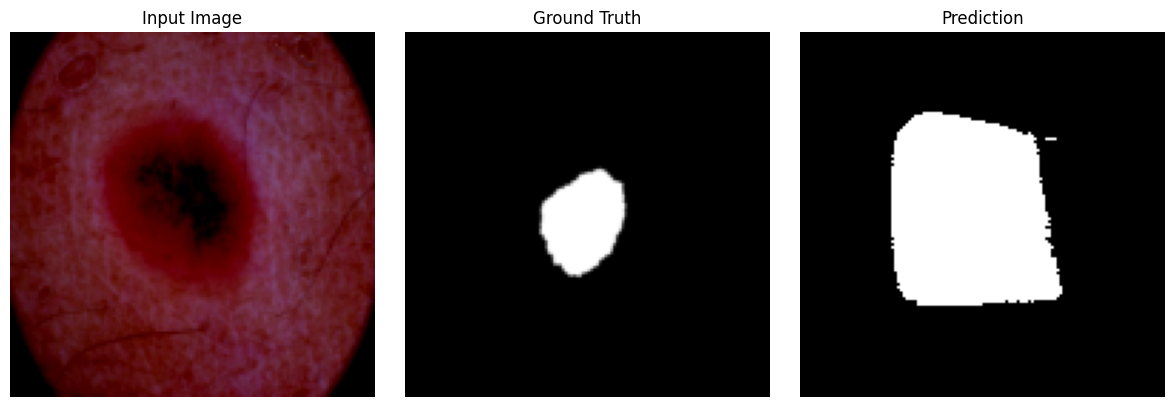

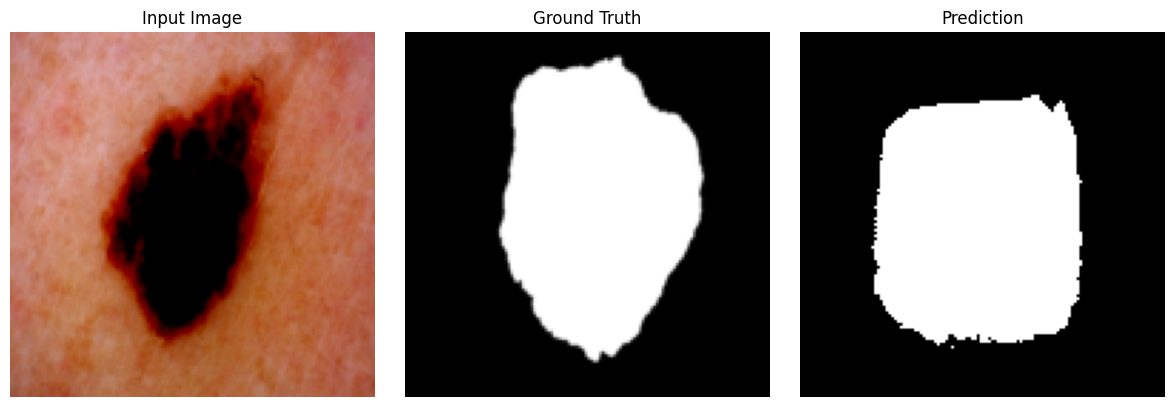

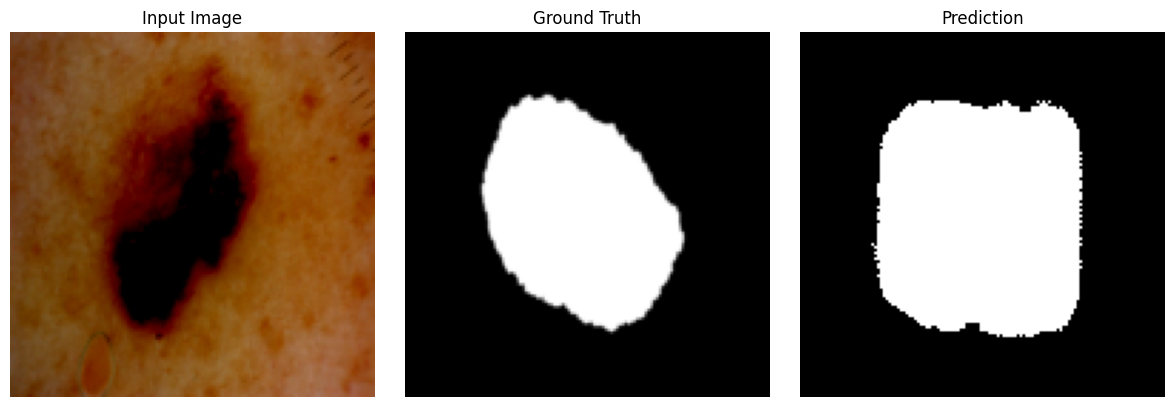

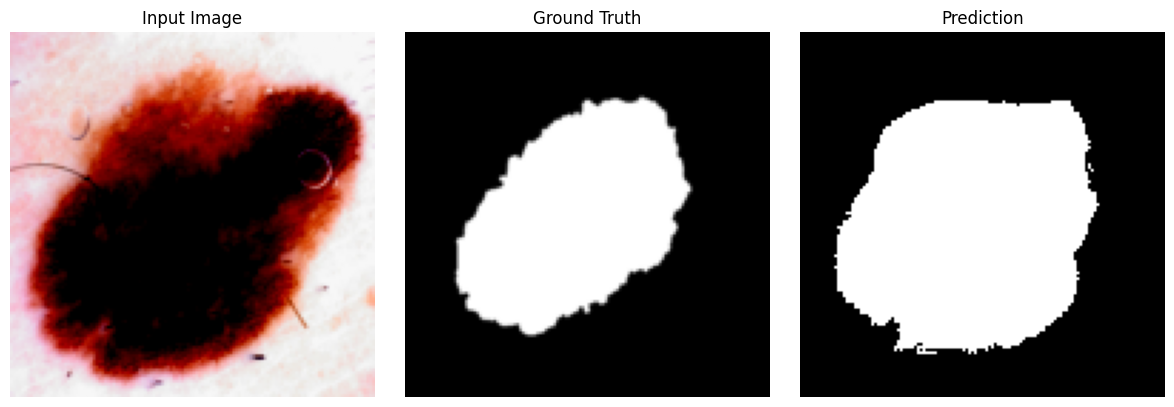

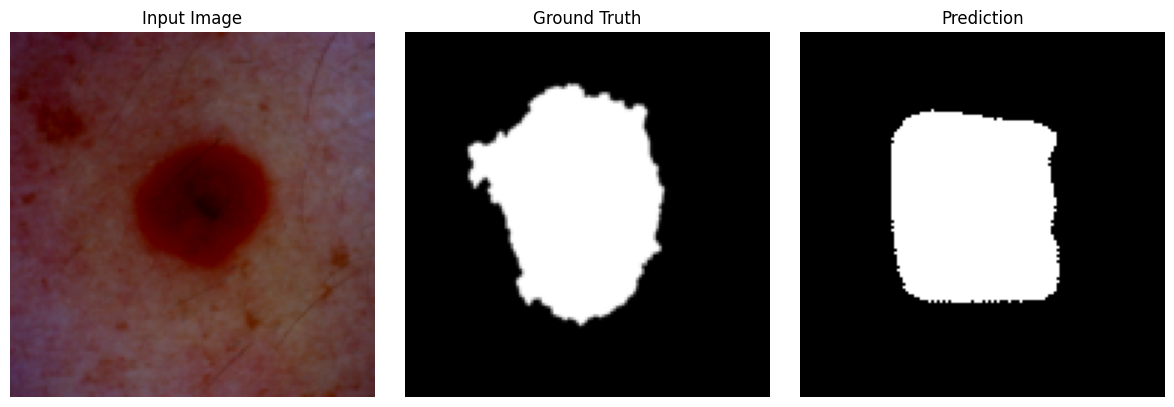

In [27]:
visual_preds(model_v2_unet, test_dataloader, device, num_samples=5)

Prediction mask over-segmented the lesion. It might be that the background is predicted as part of the lesion - false positives.
- Will try to use dice loss

[Medium Dice Loss](https://medium.com/data-scientists-diary/implementation-of-dice-loss-vision-pytorch-7eef1e438f68)

In [28]:
def dice_loss(predictions, targets, smooth=1):
  predictions = torch.sigmoid(predictions)
  predictions = predictions.view((predictions.size(0),-1)) # this flattens predictions
  targets = targets.view(targets.size(0),-1)

  intersection = (predictions * targets).sum(dim=1)
  union = predictions.sum(dim=1) + targets.sum(dim=1)

  dice = (2.0 * intersection + smooth) / (union + smooth)
  dice_loss = 1 - dice

  return dice_loss.mean() #mean dice loss for batches

In [29]:
#Parameters
lr = 5e-4
weight_decay = 8e-9
batch_size = 16
epochs = 50


model_v2_unet = UNet(in_channels=3, out_channels=1).to(device)
optimizer = optim.Adam(model_v2_unet.parameters(), lr=lr, weight_decay=weight_decay)
bce_loss_fn = nn.BCEWithLogitsLoss()
dice_loss_fn = dice_loss

early_stop = EarlyStop(patience=4, min_delta=0.001) #changed patience 3->4, and min_delta 0.001

# initialise best validation loss
best_val_loss = float('inf') #'inf' sets val_loss value as infinite value, allowing for best value to be saved
# Training loop
for epoch in range(epochs):
  model_v2_unet.train()
  running_loss = 0.0

  for batch_idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)  # Move data to device

        optimizer.zero_grad() # Reset gradients
        output = model_v2_unet(data.float()) # Forward pass

        bce = bce_loss_fn(output, target.float())
        dice = dice_loss_fn(output, target.float())
        loss = bce + dice # Calculate loss

        loss.backward() # Backward pass
        optimizer.step() # Update weights

        running_loss += loss.item() #Accumulate loss

        #binary predictions based on probabilities - use sigmoid funct to get them
        probabilities = torch.sigmoid(output)
        predictions = (probabilities >0.6).float() #adjust from 0.5 to 0.6

        #number of correct predictions
        correct_preds = (predictions == target).float().sum()
        accuracy = correct_preds / target.numel() #.numel() returns size of the tensor





        # Print progress (optional) Prints every 2 batches
        if batch_idx % 2 == 0:
            print(f'Epoch: {epoch+1}, Batch: {batch_idx}, BCE: {bce.item()}, Dice: {dice.item()}, Final Loss: {loss.item()}, Accuracy: {accuracy}')
  # Validation
  model_v2_unet.eval()
  running_val_loss = 0.0
  running_val_accuracy = 0.0

  with torch.no_grad():
    for val_data, val_target in test_dataloader:
      val_data, val_target = val_data.to(device), val_target.to(device)
      val_output = model_v2_unet(val_data.float())
      val_loss = loss_fn(val_output, val_target.float())
      running_val_loss += val_loss.item()

      probabilities = torch.sigmoid(val_output)
      val_predictions = (probabilities > 0.5).float()
      val_correct_preds = (val_predictions == val_target).float().sum()
      val_accuracy = val_correct_preds / val_target.numel()

      running_val_accuracy += val_accuracy.item()

      # Print validation metrics
    avg_val_loss = running_val_loss / len(test_dataloader)
    avg_val_accuracy = running_val_accuracy / len(test_dataloader)
    print(f'Validation Loss: {avg_val_loss}, Validation Accuracy: {avg_val_accuracy}')

    # Save the best model before early stopping is triggered
    if avg_val_loss < best_val_loss:
      best_val_loss = avg_val_loss
      torch.save(model_v2_unet.state_dict(), 'best_model_v2_unet.pth')

  # Average training loss to trigger early stop and prevent overfitting
  #avg_train_loss = running_loss / len(train_dataloader)

  early_stop(val_loss=avg_val_loss)

  if early_stop.early_stop:
    print("Early stopping has been triggered")
    break

Epoch: 1, Batch: 0, BCE: 0.8225741982460022, Dice: 0.7068309783935547, Final Loss: 1.529405117034912, Accuracy: 0.6094131469726562
Epoch: 1, Batch: 2, BCE: 0.7085740566253662, Dice: 0.5818073749542236, Final Loss: 1.2903814315795898, Accuracy: 0.608978271484375
Epoch: 1, Batch: 4, BCE: 0.661139726638794, Dice: 0.5211520195007324, Final Loss: 1.1822917461395264, Accuracy: 0.6766357421875
Epoch: 1, Batch: 6, BCE: 0.5929911136627197, Dice: 0.4944136142730713, Final Loss: 1.087404727935791, Accuracy: 0.7171287536621094
Epoch: 1, Batch: 8, BCE: 0.7130217552185059, Dice: 0.5648072957992554, Final Loss: 1.2778290510177612, Accuracy: 0.6780929565429688
Epoch: 1, Batch: 10, BCE: 0.6825424432754517, Dice: 0.4814487099647522, Final Loss: 1.1639912128448486, Accuracy: 0.6247100830078125
Validation Loss: 0.7581683844327927, Validation Accuracy: 0.2944755554199219
Epoch: 2, Batch: 0, BCE: 0.5997428894042969, Dice: 0.4903161823749542, Final Loss: 1.0900590419769287, Accuracy: 0.7036590576171875
Epoch

In [30]:
#Load your best model
model_v2_unet.load_state_dict(torch.load('best_model_v2_unet.pth'))
model_v2_unet.eval()

UNet(
  (encoder1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=T

In [31]:
visual_preds(model_v2_unet, test_dataloader, device, num_samples=15)

Output hidden; open in https://colab.research.google.com to view.

 Analyse the model's results and limitations

In [32]:
# Calculate Intersection over Union (IoU) to
import torch

def calculate_iou(predictions, targets):
  intersection = torch.logical_and(predictions, targets).sum()
  union = torch.logical_or(predictions, targets).sum()
  iou = (intersection + 1e-6) / (union + 1e-6)
  return iou

def calculate_average_iou(model, dataloader, device, threshold=0.5):
  model.eval()  # Set model to evaluation mode
  total_iou = 0
  num_images = 0

  with torch.no_grad():  # Disable gradient calculation
    for batch_idx, (data, targets) in enumerate(dataloader):
      data, targets = data.to(device), targets.to(device)

      # Get predictions (assuming sigmoid activation is already applied)
      predictions = model(data)
      predictions = (predictions > threshold).float()

      # Calculate IoU for each image in the batch
      for i in range(data.shape[0]):
        iou = calculate_iou(predictions[i], targets[i])
        total_iou += iou.item()
        num_images += 1

  average_iou = total_iou / num_images
  return average_iou

# Example usage
average_iou = calculate_average_iou(model_v2_unet, test_dataloader, device)
print(f"Average IoU: {average_iou:.4f}")

Average IoU: 0.5313


IoU ranges from 0 to 1 so IoU=0.4675 tells us the model is performing poorly - it's not identifying the object well. Meaning there is not enough overlap between prediction and ground truth.

Discuss potential ways to improve the model's performance, including adding more layers, changing/adding activation functions, changing the optimisation function, reducing overfitting, and dealing with underfitting by tweaking the learning rate, training for longer and/or using early stopping, applying data augmentation and transfer learning, and use less regularisation.

For this task I've chosen the U-Net model with encoder-decoder structure and skip connections. I've included contracting block, bottleneck and expansive block to encode and decode the data. In each expansive block i've used transposed convolution that upsamples the feature maps. The final output is a segmentation mask.
Batch normalization and ReLU activation was used to improve the performance.

With the early_stop monitoring the validation loss I was able to save the best model in the training stage - model_v2_unet.

However the models predictions were not as good as expected.

I've investigated Intersection over Union (IoU) and low score of 0.4675 shows that the model is not identifying the object well.

Score that'd be good enough for the data would be at least over 0.5 since the range of the scores is 0 to 1.

Looking at the predictions we can see that the models is good at identifiying larger structures but struggles with more details.

The prediction shaped are quite blocky which leads me to believe that there isn't enough contrast on the pictures in the dataset and the model struggles to differentiate between lesion and background.
This may be due to dataset quality. Images with higher contrast should be included in training in order to improve the performance.

Even though U-Net is a popular network used for image segmentation, maybe more sophisticated network such as VGG-UNet should be used. In the [Automated Skin Lesion Segmentation using VGG-UNet](https://ieeexplore.ieee.org/document/10068634) publication, it has been found that VGG-UNet has. shown the highest performance in comparison to few other UNet architectures.

# References
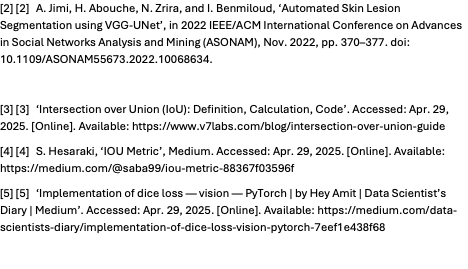